**Translation from German to English**

In [17]:
import pandas as pd

def translate_columns(input_file, output_file):
    # Loading the Excel file
    xls = pd.ExcelFile(input_file)
    df = pd.read_excel(xls, sheet_name=xls.sheet_names[0])

    # Dictionary to map German column names to English
    column_translation = {
        "Werksgüte": "Factory Quality",
        "Bestellgütentext": "Order Quality Text",
        "Nenndicke NNN.NN mm mit Dezimalpunkt": "Nominal Thickness (mm)",
        "Breite": "Width",
        "Länge": "Length",
        "Gewicht (kg)": "Weight (kg)",
        "Cluster": "Cluster",
        "Si-Gehalt": "Si Content",
        "Mn-Gehalt": "Mn Content",
        "P-Gehalt": "P Content",
        "Mo-Gehalt": "Mo Content",
        "V-Gehalt": "V Content",
        "Cu-Gehalt": "Cu Content",
        "Nb-Gehalt": "Nb Content",
        "Ti-Gehalt": "Ti Content",
        "Al-Gehalt": "Al Content",
        "B-Gehalt": "B Content",
        "Streckgrenze": "Yield Strength",
        "Zugfestigkeit": "Tensile Strength",
        "Dehnung": "Elongation"
    }

    # Renaming the columns
    df.rename(columns=column_translation, inplace=True)

    # Saving the updated file
    df.to_excel(output_file, index=False)
    print(f"Translated file saved as: {output_file}")


input_file = "supplier_data_1.xlsx"
output_file = "translated_supplier_data_1.xlsx"
translate_columns(input_file, output_file)


Translated file saved as: translated_supplier_data_1.xlsx


**Merging and Cleaning**

In [18]:
import pandas as pd

def merge_supplier_datasets(file_path_1, file_path_2):
    # Loading the Excel files
    xls1 = pd.ExcelFile(file_path_1)
    xls2 = pd.ExcelFile(file_path_2)

    # Loading the first sheet from both files
    df1 = pd.read_excel(xls1, sheet_name=xls1.sheet_names[0])
    df2 = pd.read_excel(xls2, sheet_name=xls2.sheet_names[0])

    # Identifying the similar columns with different names
    column_mapping = {
        "NOMINAL_THICKNESS_MM": "Nominal Thickness (mm)",
        "WIDTH_MM": "Width",
        "LENGTH_MM": "Length",
        "MASS_MIN_KG": "Weight (kg)"
    }

    # Rename columns in df2
    df2_renamed = df2.rename(columns=column_mapping)

    # Merge datasets
    merged_df = pd.concat([df1, df2_renamed], ignore_index=True, sort=False)

    return merged_df

# File paths (update these paths as needed)
file_path_1 = "translated_supplier_data_1.xlsx"
file_path_2 = "supplier_data_2.xlsx"

# Merge datasets
merged_data = merge_supplier_datasets(file_path_1, file_path_2)

# Save the merged dataset to a new Excel file
merged_data.to_excel("merged_dataset.xlsx", index=False)

print("Merged dataset saved as 'merged_dataset.xlsx'")


Merged dataset saved as 'merged_dataset.xlsx'


In [21]:
import pandas as pd

def clean_dataset(file_path, sheet_name='Sheet1', missing_threshold=0.2):
    # Loading the dataset
    xls = pd.ExcelFile(file_path)
    df = pd.read_excel(xls, sheet_name=sheet_name)

    # Replacing values in the PRODUCT_TYPE column

    df['PRODUCT_TYPE'] = df['PRODUCT_TYPE'].replace({'COILS_STRIP': 'COIL_STRIP', 'SHET': 'SHEET'})

    # Droping columns that contain mostly missing values
    threshold = missing_threshold * len(df)
    df_cleaned = df.dropna(thresh=threshold, axis=1)

    # Filling missing numeric values with median and categorical values with mode
    for col in df_cleaned.select_dtypes(include=['number']).columns:
        df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

    for col in df_cleaned.select_dtypes(include=['object']).columns:
        df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

    # Removing duplicates
    df_cleaned = df_cleaned.drop_duplicates()

    return df_cleaned

# Example usage
file_path = "merged_dataset.xlsx"
df_cleaned = clean_dataset(file_path)

# Save the cleaned dataset
df_cleaned.to_excel("inventory_dataset.xlsx", index=False)

print("Dataset cleaning complete. Cleaned file saved as 'inventory_dataset.xlsx'")

Dataset cleaning complete. Cleaned file saved as 'inventory_dataset.xlsx'


<ipython-input-21-2aeb2ce8831e>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)
<ipython-input-21-2aeb2ce8831e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)
<ipython-input-21-2aeb2ce8831e>:21: FutureWarning: A va

**DATA Analytics**

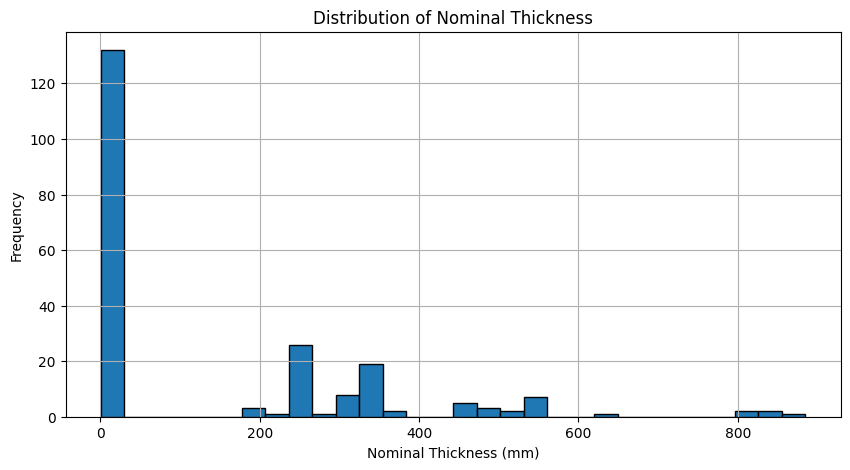

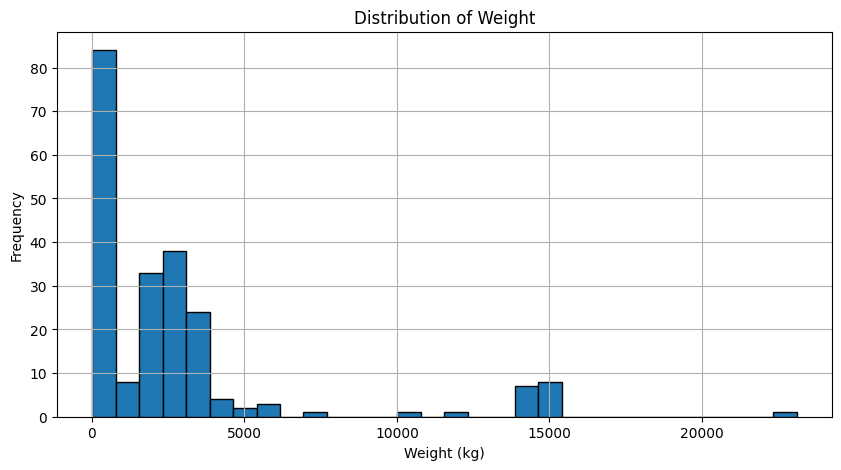

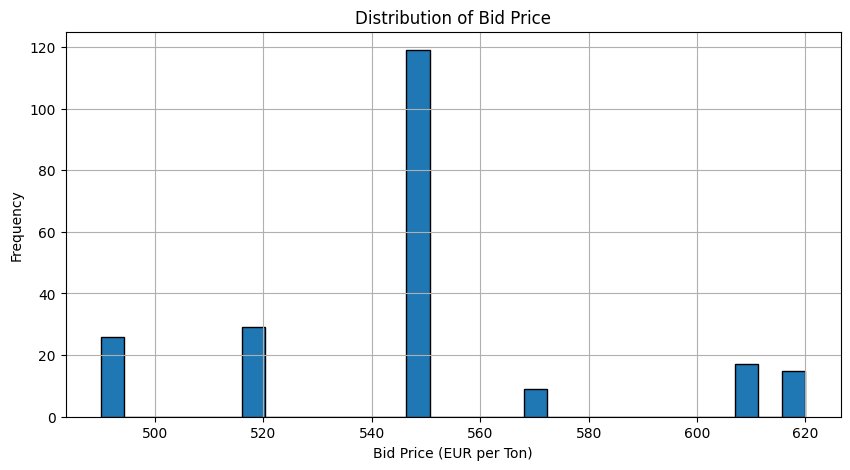

Average Bid Price per Product Type:
PRODUCT_TYPE
COIL_STRIP    543.173653
SHEET         570.000000
Name: MIN/MAX_BID_EUR_PER_TON, dtype: float64


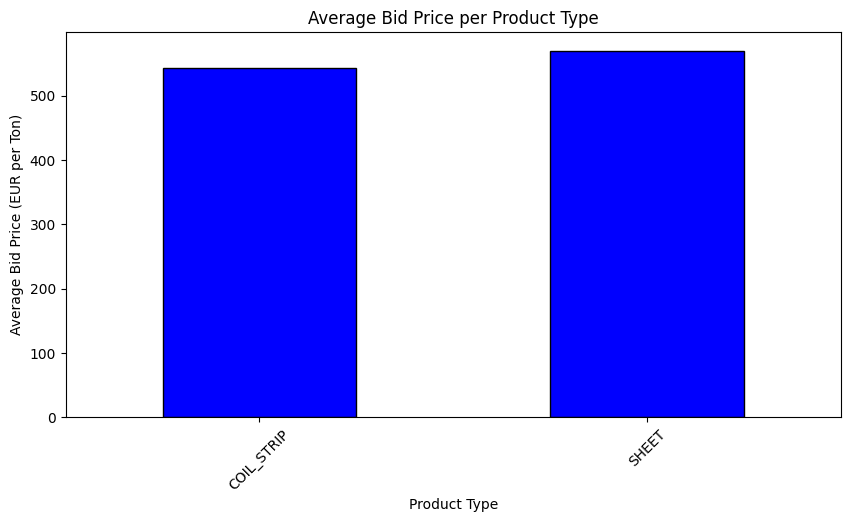

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_distribution(df, column, xlabel, title):
    """Plots the distribution of a numerical column."""
    plt.figure(figsize=(10, 5))
    df[column].hist(bins=30, edgecolor='black')
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

def analyze_metal_trading(file_path):
    """Performs analysis on metal trading dataset."""
    df = pd.read_excel(file_path)

    # Plot distributions
    plot_distribution(df, 'Nominal Thickness (mm)', 'Nominal Thickness (mm)', 'Distribution of Nominal Thickness')
    plot_distribution(df, 'Weight (kg)', 'Weight (kg)', 'Distribution of Weight')
    plot_distribution(df, 'MIN/MAX_BID_EUR_PER_TON', 'Bid Price (EUR per Ton)', 'Distribution of Bid Price')

    # Analyze product type vs. average bid price
    product_avg_price = df.groupby('PRODUCT_TYPE')['MIN/MAX_BID_EUR_PER_TON'].mean().sort_values()
    print("Average Bid Price per Product Type:")
    print(product_avg_price)

    # Plot average bid price per product type
    plt.figure(figsize=(10, 5))
    product_avg_price.plot(kind='bar', color='blue', edgecolor='black')
    plt.xlabel('Product Type')
    plt.ylabel('Average Bid Price (EUR per Ton)')
    plt.title('Average Bid Price per Product Type')
    plt.xticks(rotation=45)
    plt.show()


file_path = "inventory_dataset.xlsx"
analyze_metal_trading(file_path)
